# ARIMA Stock Price Prediction: Model Hyperparameter Selection and Performance Analysis

Control Factors:  
1. ARIMA order: (3,1,0), (4,1,0), (3,0,0), ...  
2. History window: 100, 50, 30, 15, 10. 
3. Forecast horizon: 1, 3, 5,  7, 14, 30  
4. TODO: Feature normalization: None, MinMaxScaler, StandardScaler  

Collected Metrics:  
1. MAPE (Mean Absolute Percentage Error)  

\begin{align}
\mbox{MAPE} = \frac{1}{n}\sum_{t=1}^n  \left|\frac{A_t-F_t}{A_t}\right|
\end{align}

(https://en.wikipedia.org/wiki/Mean_absolute_percentage_error)

2. MSE (Mean Squared Error) - from sklearn.metrics import mean_squared_errors.

\begin{align}
\operatorname{MSE}=\frac{1}{n}\sum_{i=1}^n(Y_i-\hat{Y_i})^2
\end{align}

(https://en.wikipedia.org/wiki/Mean_squared_error)
This will then be converted to RMSE, which is another common metric. (TODO)

3. Mean of Prediction Error  
4. Std. Dev. of Prediction Error  
5. Min Prediction Error  
6. Max Prediction Error  
7. Distribution plot of Prediction Error for Each Series. 

We confirm that error is normally distributed (visually) and so there is no hidden model prediction error.

8. Plot of each series when applied with each forecast method configuration, the fitted values, and the forecasted values.


Target: price vs return (this part we already pick price over return as target variable). The model predict stock price in the future. The future price will be converted to return. We choose to predict price over return because from the ACF, PACF (autocorrelation plot), the regression relationship for lagged price show better explaination than the lagged return in for the same time-series.



In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import os, sys, os.path

%matplotlib inline

In [28]:
# These are experiments successfully ran. So far 36 stocks. Still working on getting all SET50 to work.
df_all = pd.DataFrame()
for f in os.listdir('output'):
    df = pd.read_csv('output/%s' % f)
    ticker = f.split('_')[-1].replace('.csv','')
    print(ticker)
    # print(df.head())
    df_all = df_all.append(df, ignore_index=True)

INTUCH
IVL
GLOBAL
BANPU
MINT
TMB
TTW
IRPC
CPALL
RATCH
AOT
KTB
BEC
PTT
JAS
CPF
BCP
BAY
DELTA
CENTEL
errors
TRUE
CK
PTTEP
BTS
ADVANC
LH
TCAP
CPN
PTTGC
THCOM
SCCC
SCC
KBANK
BBL
TOP
THAI


In [29]:
df_all.to_csv('arima-all-results.csv')
df_all.head()

,Unnamed: 0,MAPE,batches_tried,error_max,error_mean,error_min,error_std,forecast_days,history_window,observations,series_id
0,0,0.013859,1381.0,0.280446,-0.000623,-0.162747,0.022319,1.0,10.0,1572.0,INTUCH
1,1,0.024430,1379.0,0.264287,-0.001272,-0.388044,0.039214,3.0,10.0,1572.0,INTUCH
2,2,0.032907,1377.0,0.207264,-0.001631,-0.632644,0.053050,5.0,10.0,1572.0,INTUCH
3,3,0.041537,1376.0,0.302239,-0.002131,-0.886889,0.068455,7.0,10.0,1572.0,INTUCH
4,4,0.071648,1369.0,0.801795,-0.003359,-2.310144,0.131311,14.0,10.0,1572.0,INTUCH


## How many days ahead can we make forecast?

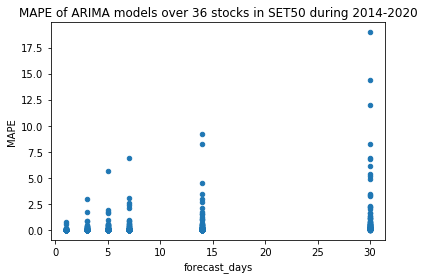

In [30]:

title = 'MAPE of ARIMA models over 36 stocks in SET50 during 2014-2020'
df_all[['MAPE', 'forecast_days']].plot.scatter(x='forecast_days', y='MAPE', title=title)


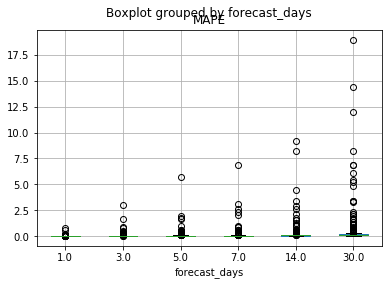

In [31]:
title = 'MAPE of ARIMA models over 36 stocks in SET50 during 2014-2020'
df_all.boxplot(['MAPE'], by='forecast_days')

## How many days in history to use for model window?

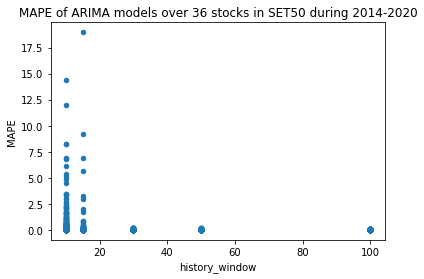

In [32]:
title = 'MAPE of ARIMA models over 36 stocks in SET50 during 2014-2020'
df_all[['MAPE', 'history_window']].plot.scatter(x='history_window', y='MAPE', title=title)

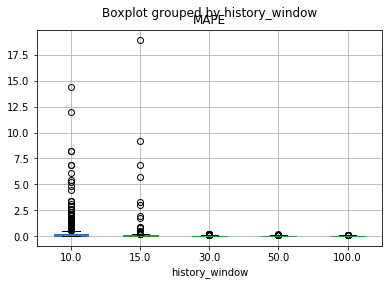

In [33]:
title = 'MAPE of ARIMA models over 36 stocks in SET50 during 2014-2020'
df_all.boxplot(['MAPE'], by='history_window')

# What were the really bad prediciton e.g. MAPE > 2.5?

In [34]:
df_bad = df_all[df_all['MAPE']>=3.0]
df_bad.head()

,Unnamed: 0,MAPE,batches_tried,error_max,error_mean,error_min,error_std,forecast_days,history_window,observations,series_id
214,34,8.254759,719.0,5760.943664,8.022416,-6.423966,214.847267,14.0,10.0,1572.0,BANPU
215,35,14.346815,711.0,9729.107741,13.710442,-17.986598,364.873154,30.0,10.0,1572.0,BANPU
635,35,6.906208,644.0,3726.210039,6.102378,-74.879241,147.230530,30.0,10.0,1572.0,AOT
757,37,3.018232,1496.0,0.311973,-2.974626,-4447.907736,114.997896,3.0,15.0,1572.0,BEC
758,38,5.680607,1494.0,0.494674,-5.622356,-8398.419298,217.281242,5.0,15.0,1572.0,BEC


Most probably due to ARIMA fitting error. Notabably this occur when using too few history and trying to project to long into the future.


Error messages:
```
The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.
```
```
SVD did not converge
```

Idea / TODO:  
* better check stationarity property of the time-series and try to handle appropriately by selecting and apply transformation function to the data.

# General idea of ARIMA model performance

Looking at MAPE matric across several time-series, we get some picture of the forecast accuracy / predictive power of ARIMA. 

Further parameter search might further improve performance, so future work in hyperparameter tuning and model selection is still critical and open task/problem for the research.

Text(0.5, 1.0, 'Boxplot of prediction MAPE for each series')

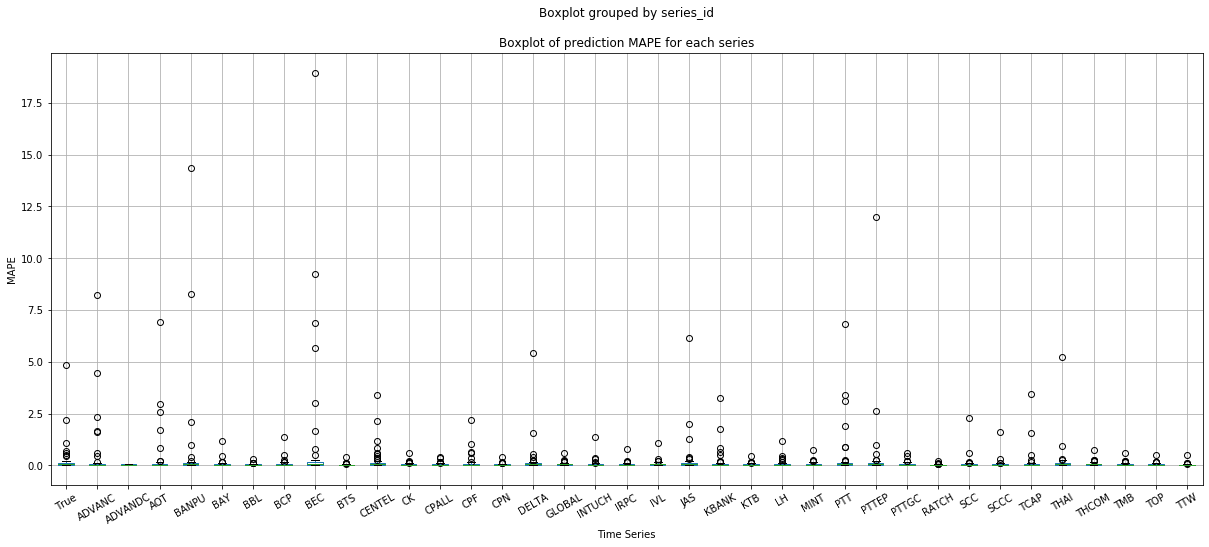

In [36]:

df_all[['MAPE','series_id']].boxplot('MAPE', by=['series_id'], figsize=(20,8), rot=30)
plt.ylabel('MAPE')
plt.xlabel('Time Series')
plt.title(label="Boxplot of prediction MAPE for each series")

Text(0.5, 1.0, 'MAPE distribution of 36 stocks forecast 5 days ahead, using 30 days history.')

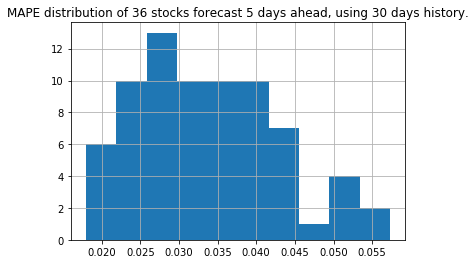

In [37]:
## Forecast 5 day, show MAPE distribution

f5 = df_all[df_all['forecast_days'] == 5]
w30 = f5[f5['history_window'] == 30]

w30['MAPE'].hist()
plt.title(label="MAPE distribution of 36 stocks forecast 5 days ahead, using 30 days history.")

Text(0.5, 1.0, 'MAPE distribution of 36 stocks forecast 7 days ahead, using 30 days history.')

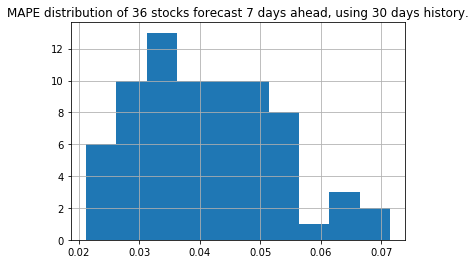

In [38]:
## Forecast 7 day, show MAPE distribution

f5 = df_all[df_all['forecast_days'] == 7]
w30 = f5[f5['history_window'] == 30]

w30['MAPE'].hist()
plt.title(label="MAPE distribution of 36 stocks forecast 7 days ahead, using 30 days history.")